
## California Housing 1990 - Regression Modelling


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tabulate import tabulate
# import tensorflow_data_validation as tfdv
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
15205,-117.07,33.01,5.0,5870.0,977.0,1917.0,842.0,5.1998,294100.0,<1H OCEAN
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,209200.0,<1H OCEAN
15207,-117.07,33.00,4.0,6242.0,1258.0,2211.0,1116.0,4.2500,281600.0,<1H OCEAN
15208,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15210.000000,15210.000000,15210.000000,15210.000000,15062.000000,15210.000000,15210.000000,15210.000000,15210.000000
mean,-119.013605,35.157512,28.958909,2639.069954,543.708405,1443.109467,502.916568,3.803106,198435.696187
std,1.840608,2.049149,12.366761,2266.803851,437.779990,1142.507915,394.184695,1.888558,111404.650522
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,23.000000
25%,-120.380000,33.870000,19.000000,1430.000000,295.000000,791.000000,278.000000,2.510175,116700.000000
50%,-118.280000,34.080000,30.000000,2092.000000,433.000000,1167.000000,407.000000,3.454250,170700.000000
75%,-117.900000,36.950000,37.000000,3107.000000,648.000000,1742.000000,602.000000,4.660575,245775.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [ ]:
train_stats = tfdv.generate_statistics_from_dataframe(df)

In [ ]:
tfdv.visualize_statistics(train_stats)

TFDV helps you to understand the distribution of your data, identify potential data quality issues, and monitor how the data changes over time. This can be important for improving the performance of your machine learning models.

In [ ]:
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'longitude',FLOAT,required,,-
'latitude',FLOAT,required,,-
'housing_median_age',FLOAT,required,,-
'total_rooms',FLOAT,required,,-
'total_bedrooms',FLOAT,optional,single,-
'population',FLOAT,required,,-
'households',FLOAT,required,,-
'median_income',FLOAT,required,,-
'median_house_value',FLOAT,required,,-


,Values
Domain,
'ocean_proximity',"'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'"


In [ ]:
anomalies = tfdv.validate_statistics(statistics=train_stats, schema=schema)
tfdv.display_anomalies(anomalies)

In [ ]:
target = 'median_house_value'
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

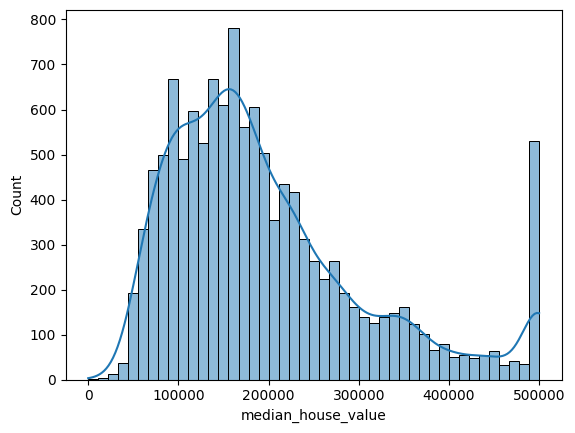

<Figure size 640x480 with 0 Axes>

In [ ]:
#histogram and normal probability plot
sns.histplot(y_train, kde=True, stat="count")
fig = plt.figure()

It's a histogram that visualizes the distribution of the target variable in your training data. The x-axis represents the range of values for the target variable, and the y-axis shows the number of data points that fall within each bin (count). The smooth curve on the histogram represents the KDE plot.

By looking at this histogram, you can see how frequently each value of the target variable appears in your training data. This can help you to identify potential issues with your data, such as skewness or outliers. The KDE plot can also give you a more general sense of the distribution of the data.

In [ ]:
y_train = y_train[y_train.values<500001]
X_train = X_train.loc[y_train.index]

y_test = y_test[y_test.values<500001]
X_test = X_test.loc[y_test.index]

## Imputing Null Values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
households_df_train = X_train[['households', 'total_bedrooms']]
households_df_test = X_test[['households', 'total_bedrooms']]


In [ ]:
train_nonnull_df = households_df_train[~households_df_train.total_bedrooms.isna()]
train_null_df = households_df_train[households_df_train.total_bedrooms.isna()]

test_nonnull_df = households_df_test[~households_df_test.total_bedrooms.isna()]
test_null_df = households_df_test[households_df_test.total_bedrooms.isna()]


In [ ]:
hdf_xtrain = train_nonnull_df[['households']]
hdf_ytrain = train_nonnull_df['total_bedrooms']

hdf_xtest = train_nonnull_df[['households']]
hdf_ytest = train_nonnull_df['total_bedrooms']


In [ ]:
bedrooms_model = LinearRegression()
bedrooms_model.fit(hdf_xtrain, hdf_ytrain)
mean_absolute_error(hdf_ytrain, bedrooms_model.predict(hdf_xtrain))


37.297193742822664

In [ ]:
train_null_df['total_bedrooms'] = bedrooms_model.predict(train_null_df[['households']])
test_null_df['total_bedrooms'] = bedrooms_model.predict(test_null_df[['households']])

X_train['total_bedrooms'] = pd.concat([train_nonnull_df, train_null_df])['total_bedrooms']

X_test['total_bedrooms'] = pd.concat([test_nonnull_df, test_null_df])['total_bedrooms']

## Outlier Detection

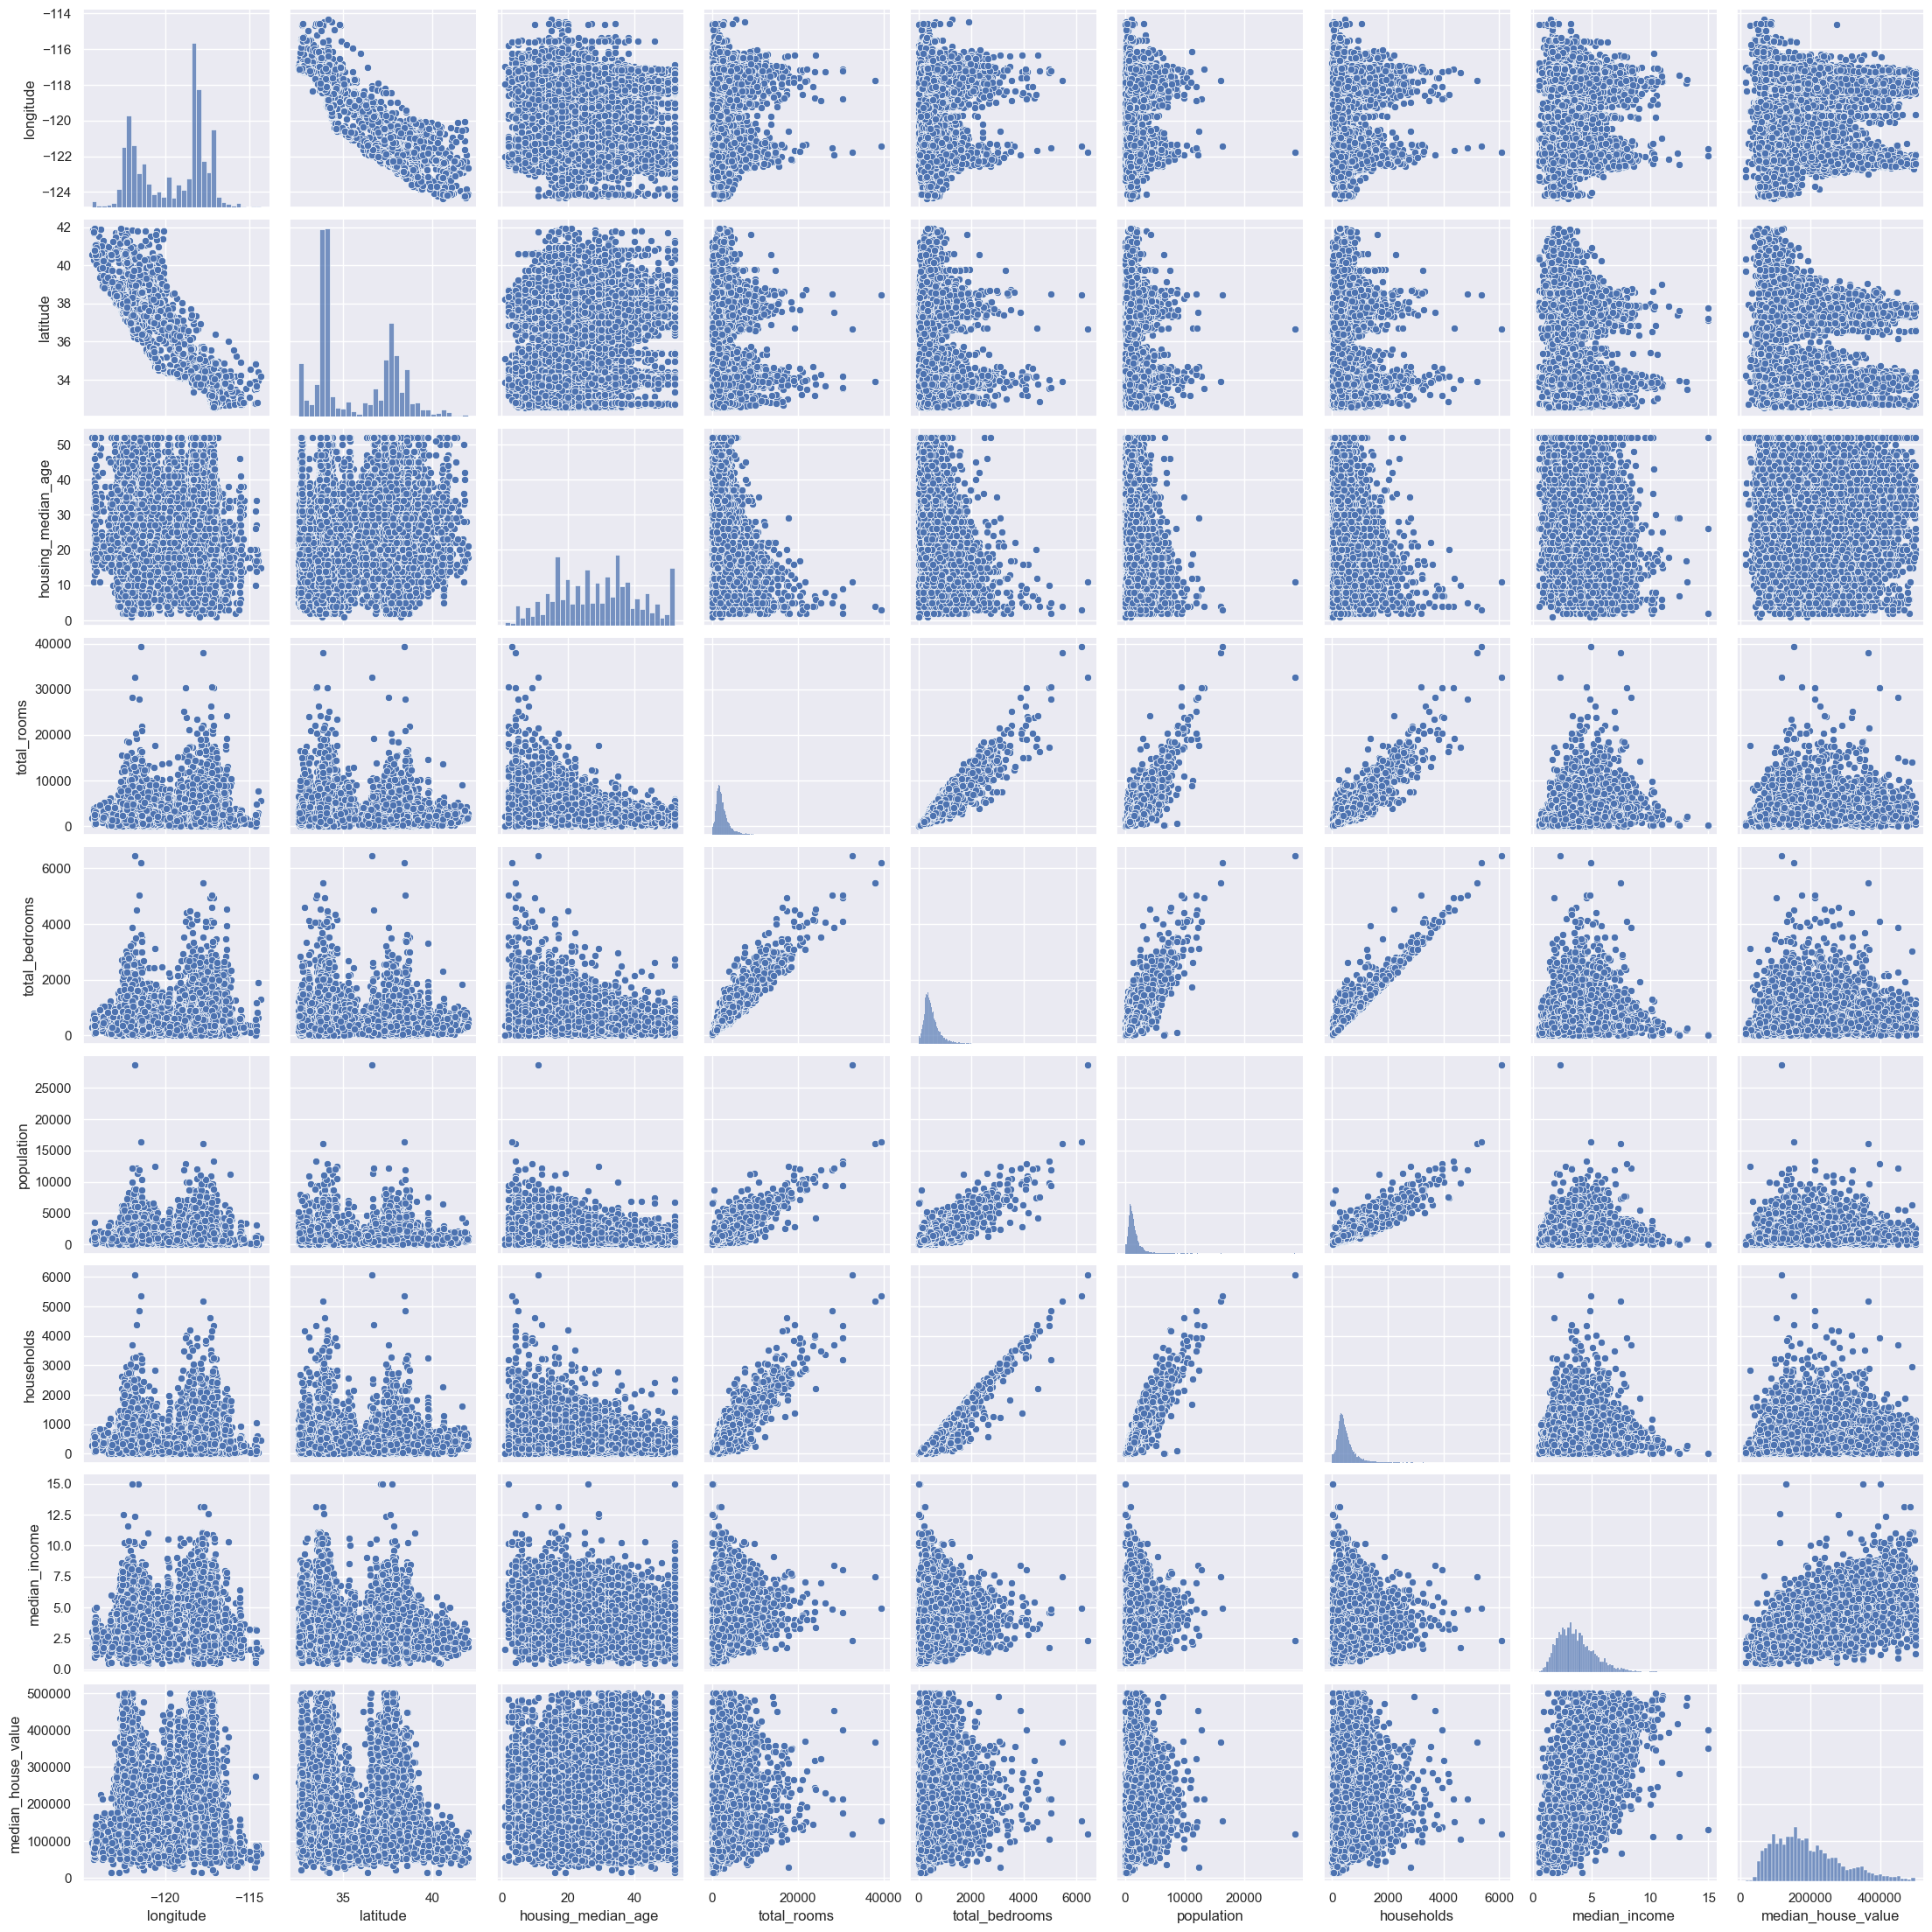

In [ ]:
sns.set()
plot_df = pd.concat([X_train.drop('ocean_proximity', axis=1), y_train], axis=1)
sns.pairplot(plot_df, height = 2.5)
plt.show()

* Most of the features were non-linear to target
* Total_bedrooms and households correlated more(Seems to be a duplication)
* Total_rooms, total_bedrooms and population are similar and correlated with eachother.
* Median_income have a linear relationship with the target.
* Latitude and Longitude seems to have no linear relationship with target, but most data points rely in two particular location(Might be most populated places)

##### Suspected Outliers
* Housing_median_age have a range of 0-52, in which most of the data are capped with 52(>1000 records).
* Population feature seems to have an outlier that is messing up in the plot.
* total_rooms, median_income have slight possibility of outlier data points.


It's a grid of scatter plots, where each subplot shows the relationship between two features from your data. The diagonal plots along the main diagonal are histograms of each individual feature.

By looking at this pairplot, you can see how the different features in your training data relate to each other and to the target variable.

##### Population Feature

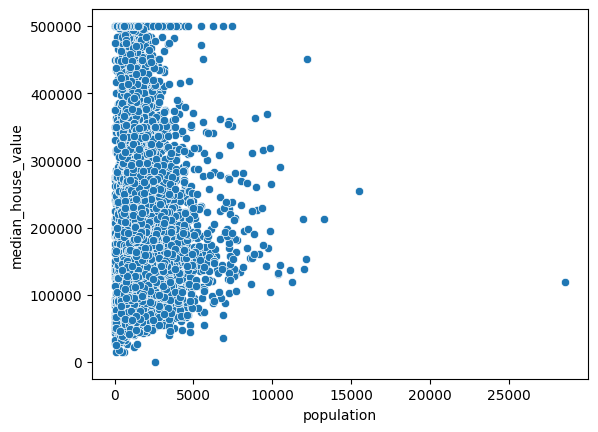

In [ ]:
sns.scatterplot(x=X_train.population, y=y_train)
plt.show()

From the plot, it appears that there might be a positive correlation between population and median house value. This means that houses in areas with higher populations tend to have higher median house values.

In [ ]:
X_train = X_train[X_train.population<11500]
X_test = X_test[X_test.population<11500]

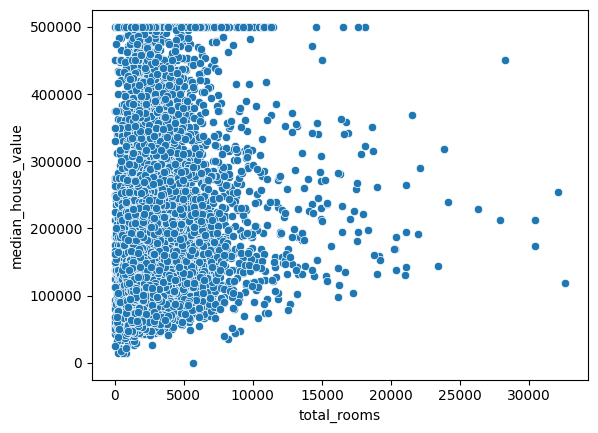

In [ ]:
sns.scatterplot(x=X_train.total_rooms, y=y_train)
plt.show()

The median house value appears to be higher for houses closer to the ocean (categories 'NEAR OCEAN' and 'OCEAN') compared to houses further inland. This is because the center line is higher for these categories.

The spread of the data (as represented by the IQR) seems to be larger for categories 'NEAR OCEAN' and 'OCEAN' compared to inland categories. This is because the boxes for these categories are taller.

There appear to be some outliers for all categories, represented by the individual circles beyond the whiskers. These outliers are data points that fall outside the range of values expected based on the IQR.

In [ ]:
X_train = X_train[X_train.total_rooms<25000]
X_test = X_test[X_test.total_rooms<25000]

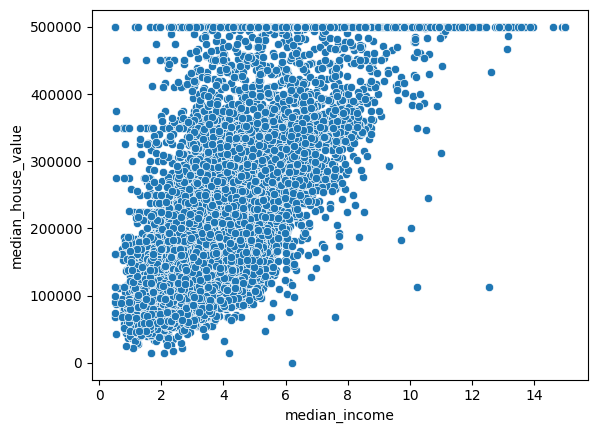

In [ ]:
sns.scatterplot(x=X_train.median_income, y=y_train)
plt.show()

The image shows a bar chart titled "Average Daily Views by Video Category". The x-axis shows the video category ID, and the y-axis shows the average number of daily views. The bars are colored from light green to dark blue.

The video category with the category ID "24" has the highest average daily views, at around 16.1 million views per day.

There is a general trend of decreasing average daily views as you move from left to right on the chart, with a few exceptions. For example, the category ID "1" (Entertainment) has a higher average daily view than category ID "2" (Music).

The x-axis labels are rotated 45 degrees to prevent overlapping due to potentially long category names.

In [ ]:
X_train = X_train[X_train.median_income<12]
X_test = X_test[X_test.median_income<12]

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1032,-120.80,38.51,23.0,1001.0,195.0,369.0,157.0,3.1250,INLAND
10807,-117.93,33.65,35.0,2133.0,413.0,1473.0,402.0,4.4211,<1H OCEAN
87,-122.27,37.81,10.0,875.0,348.0,546.0,330.0,0.7600,NEAR BAY
4395,-118.28,34.08,52.0,2465.0,773.0,2328.0,746.0,2.6178,<1H OCEAN
19053,-121.69,38.16,33.0,1808.0,363.0,824.0,340.0,3.2937,INLAND
...,...,...,...,...,...,...,...,...,...
19527,-120.96,37.64,41.0,1467.0,328.0,673.0,310.0,2.7917,INLAND
20414,-118.85,34.18,11.0,5873.0,1455.0,3089.0,1365.0,3.5504,<1H OCEAN
9526,-123.16,39.13,33.0,1320.0,303.0,1048.0,303.0,1.7813,<1H OCEAN
9771,-121.40,36.38,39.0,2288.0,529.0,1449.0,410.0,3.3289,<1H OCEAN


<Axes: xlabel='latitude', ylabel='longitude'>

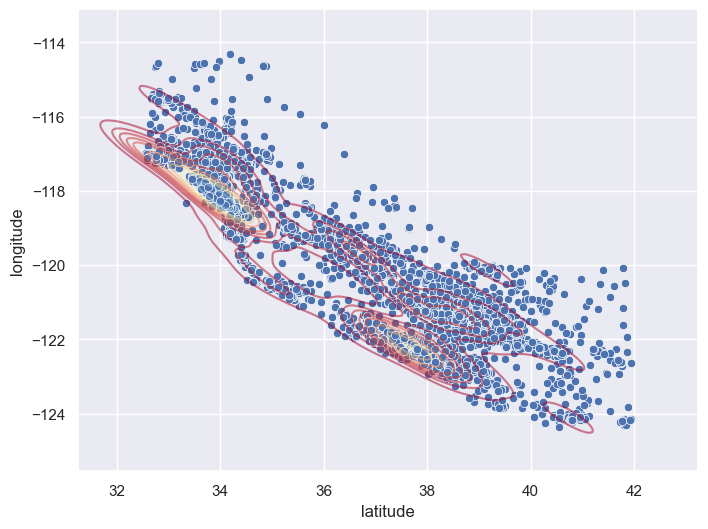

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train.latitude, y=X_train.longitude)
sns.kdeplot(x=X_train.latitude, y=X_train.longitude, cmap="RdYlBu", alpha=0.5)


Top performing category:
The category with ID "24" stands out with the highest average daily views, exceeding 16 million views. This category might represent content that is particularly engaging to viewers on Youtube.

Distribution of views: There seems to be a considerable difference in average daily views between the top category and the rest. The remaining categories appear to fall into a range of roughly 4 million to 8 million daily views.

Gradual decline: There's a general trend of average daily views decreasing as you move from left to right across the chart, with some exceptions. This suggests that video categories towards the beginning (lower IDs) might be more popular in general compared to categories towards the end (higher IDs).

Category ID limitations: While the chart provides insights into relative viewership between categories, the category IDs themselves don't reveal the specific content. It would be helpful to know the actual categories (e.g., "24" might be "Entertainment") to understand what kind of videos are most popular.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ocean_enc = OrdinalEncoder()
ocean_enc.fit(X_train[['ocean_proximity']])

OrdinalEncoder()

In [ ]:
X_train['ocean_proximity'] = ocean_enc.transform(X_train[['ocean_proximity']])
X_test['ocean_proximity'] = ocean_enc.transform(X_test[['ocean_proximity']])


<Axes: >

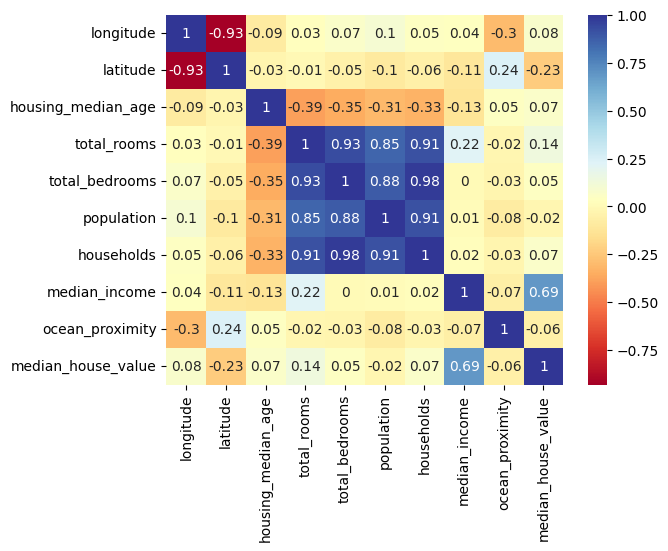

In [ ]:
X = pd.concat([X_train, y_train], axis=1)
sns.heatmap(np.round(X.corr(),2), cmap="RdYlBu", annot=True)

If a feature like "number of bedrooms" has a strong positive correlation with the target variable, it might suggest that houses with more bedrooms tend to have higher median house values.

If a feature like "distance to freeway" has a negative correlation with the target variable, it might suggest that houses further away from freeways tend to have higher median house values.

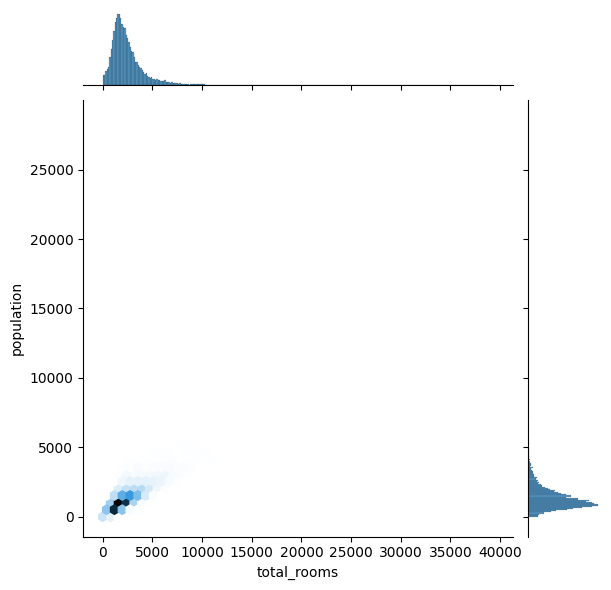

In [43]:
sns.jointplot(x='total_rooms', y='population', data=df, kind='hex')
plt.show()


In this specific jointplot, the x-axis shows the number of rooms in a building and the y-axis shows the population of the building. The kind argument set to ‘hex’ creates a hexagonal bin plot, which is a type of density plot that breaks down the data points into small hexagons. The color intensity of each hexagon represents the number of data points that fall within that hexagon.

Here are some of the things we can learn from this jointplot:

    The distribution of the number of rooms in buildings.
    The distribution of the population in buildings.
    The relationship between the number of rooms in a building and the population of the building.
    For example, you can see if there is a trend towards buildings with more rooms having higher populations.

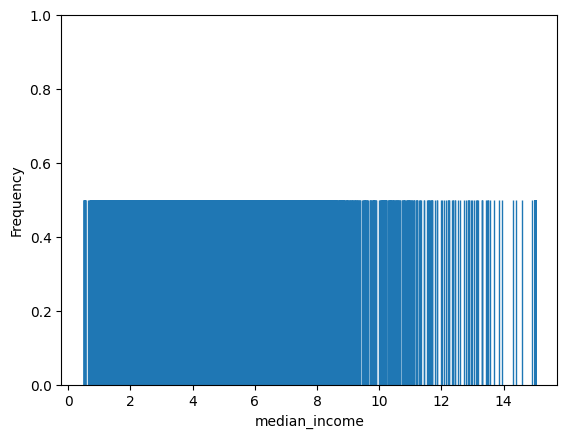

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def rugplot_with_yaxis(x, data, height=0.5, ylim=None, ylabel=None):
    sns.rugplot(x=x, data=df, height=height)
    plt.ylim(ylim)
    if ylabel:
        plt.ylabel(ylabel)
    plt.show()

rugplot_with_yaxis(x='median_income', data=df, height=0.5, ylim=(0, 1), ylabel='Frequency')

This is a rug plot for the median_income column in a DataFrame called df. It sets the height of the ticks to 0.5, the y-axis limits to (0, 1), and the y-axis label to 'Frequency'.

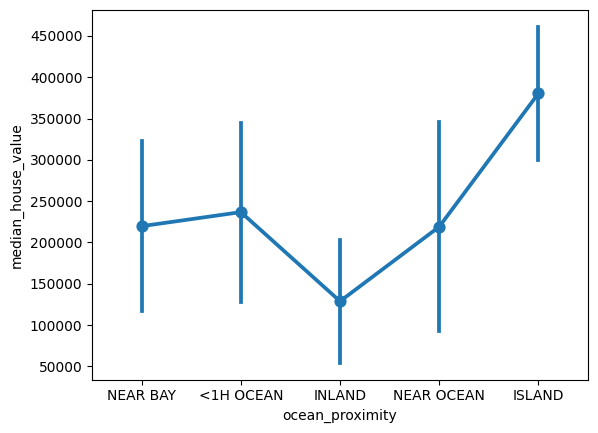

In [46]:
sns.pointplot(x='ocean_proximity', y='median_house_value', data=df, ci='sd')
plt.show()


The y-axis shows the median house value in dollars. Each data point represents the average median house value for a particular category of ocean proximity. The error bars represent the standard deviation of the median house value within that category.

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through each column and create a density plot
for i, col in enumerate(df.columns):
    if col != 'ocean_proximity':
        sns.kdeplot(data=df, x=col, hue='ocean_proximity', ax=axes[i//3, i%3], fill=True)
        axes[i//3, i%3].set_title(col)

plt.tight_layout()
plt.show()

An if statement checks if the current column (
col) is not equal to 'ocean_proximity'.

    If the condition is true, a density plot is created for the current column. This plot is colored by the 'ocean_proximity' column using the hue argument.
    The plot is then added to the axes at the current row and column index using ax=axes[i//3, i%3].
    If the condition is false, no plot is created for that column because it is assumed to be the 'ocean_proximity' column.

It shows a grid of density plots, where each subplot visualizes the distribution of a numeric column in the data, colored by the categories in the 'ocean_proximity' column.

In [ ]:
# Extract numerical columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Calculate the number of plots needed
num_plots = len(numeric_cols)

# Calculate the number of rows and columns for the subplot grid
num_rows = (num_plots + 2) // 3  # Adding 2 to account for rounding
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot violin plots for each numerical variable
for i, col in enumerate(numeric_cols):
    sns.violinplot(x='ocean_proximity', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if necessary
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




This graph shows a grid of violin plots, where each subplot shows the distribution of a numeric variable in the dataframe, broken down by the categories in the 'ocean_proximity' column. The wider areas of the violin plot represent a higher density of data points at that value, while the narrower areas represent a lower density. The center line of the violin plot represents the median value, and the box in the middle of the violin plot represents the interquartile range (IQR) which is the range between the 25th and 75th percentiles.


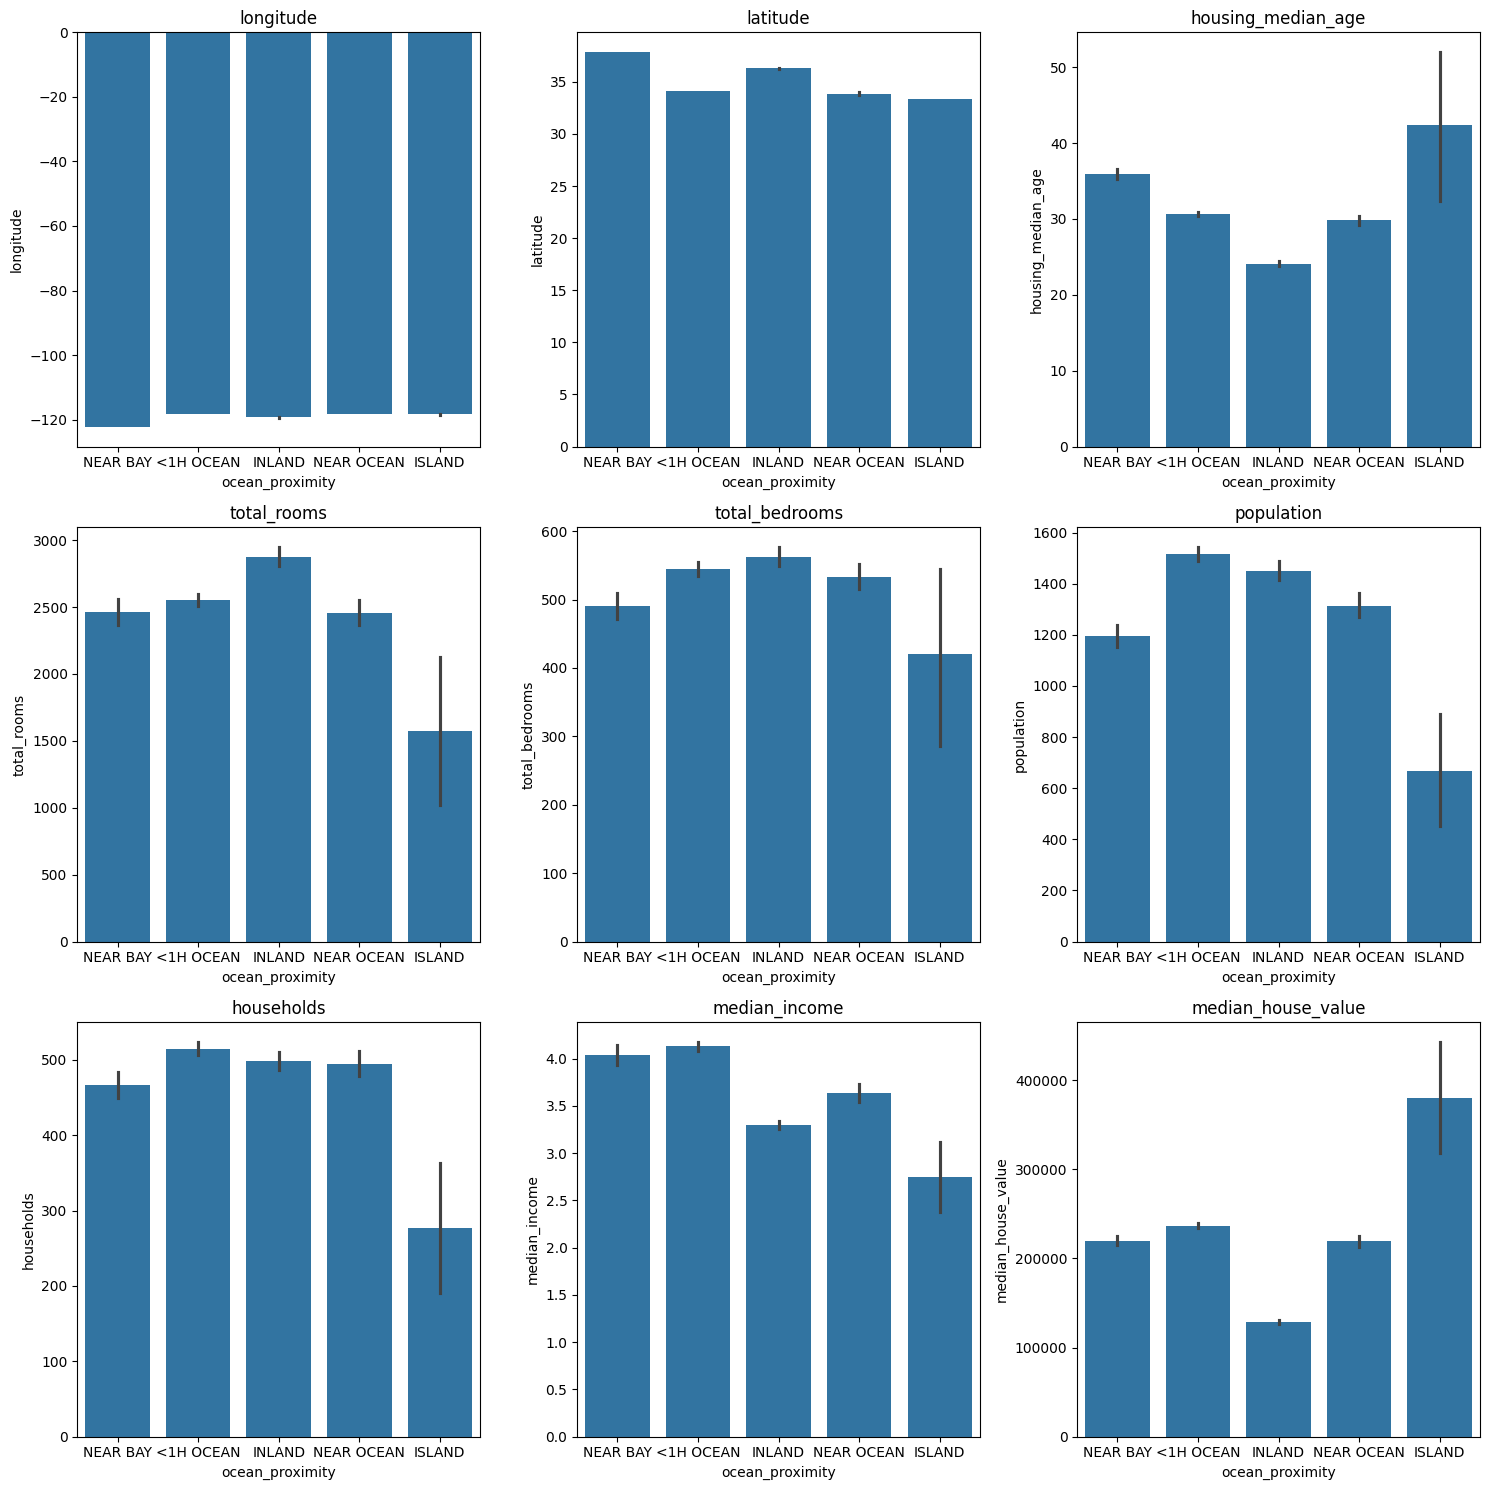

In [49]:
# Extract numerical columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Calculate the number of plots needed
num_plots = len(numeric_cols)

# Calculate the number of rows and columns for the subplot grid
num_rows = (num_plots + 2) // 3  # Adding 2 to account for rounding
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot bar plots for each numerical variable
for i, col in enumerate(numeric_cols):
    sns.barplot(x='ocean_proximity', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if necessary
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

It's a grid of bar charts, where each subplot shows the average value of a numeric variable for each category in 'ocean_proximity'. The height of the bars represents the average value.

In [ ]:
X_train = X_train.drop(['total_bedrooms', 'population'], axis=1)
X_test = X_test.drop(['total_bedrooms', 'population'], axis=1)

In [ ]:
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_optimizers = {
    'SGD': 'sgd',
    'Adam': 'adam'
}
mlp_learning_rates =  [0.01, 0.001]

        MLP Model
--------------------------
Trainable Params - 10
Hidden Layers - 0
Epochs - 100
Loss - Mean Squared Error
Batch size - 32

┌────────────────────────┬─────────┬─────────┐
│ MAE(Optimizer vs LR)   │    0.01 │   0.001 │
├────────────────────────┼─────────┼─────────┤
│ SGD                    │ 43013.8 │ 53091.1 │
├────────────────────────┼─────────┼─────────┤
│ Adam                   │ 43201.6 │ 48882.7 │
└────────────────────────┴─────────┴─────────┘
┌─────────────────────────┬─────────┬─────────┐
│ RMSE(Optimizer vs LR)   │    0.01 │   0.001 │
├─────────────────────────┼─────────┼─────────┤
│ SGD                     │ 60344.4 │ 71711.5 │
├─────────────────────────┼─────────┼─────────┤
│ Adam                    │ 60480   │ 66505.7 │
└─────────────────────────┴─────────┴─────────┘


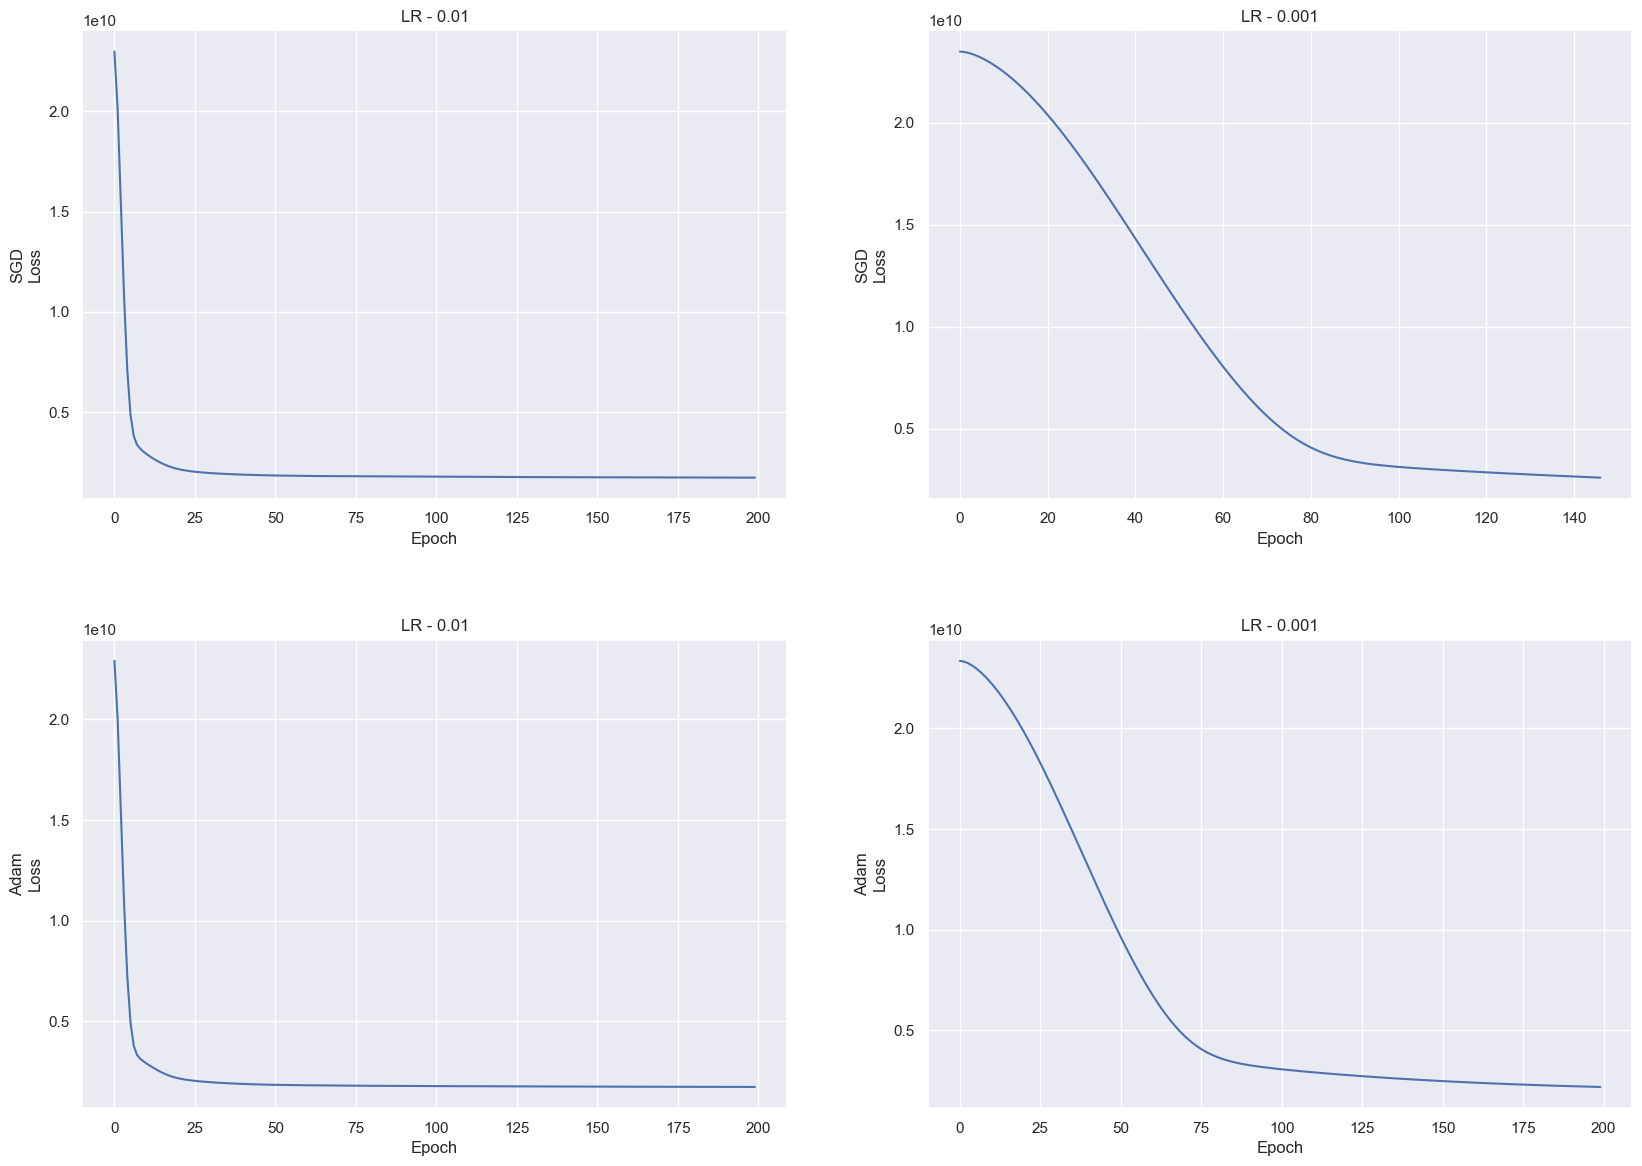

In [ ]:
print(f"        MLP Model\n"
      "--------------------------\n"
      "Trainable Params - 8\n"
      "Hidden Layers - 0\n"
      "Epochs - 100\n"
      "Loss - Mean Squared Error\n"
      "Batch size - 32\n")

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
plt.subplots_adjust(hspace=0.3)
i = j = 0
mae_tab_list = []
rmse_tab_list = []

for optimizer_name in mlp_optimizers:
    j=0
    mae_list = [optimizer_name]
    rmse_list = [optimizer_name]
    for learning_rate in mlp_learning_rates:

        model = MLPRegressor(activation='relu',
                            solver='adam',
                            batch_size=32,
                            learning_rate_init=learning_rate,
                            early_stopping=True)

        model_history = model.fit(X_train,
                                  y_train)

        mae = mean_absolute_error(y_test, model.predict(X_test))
        rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        mae_list += [mae]
        rmse_list +=[rmse]

        axs[i, j].plot(model.loss_curve_)
        axs[i, j].set_title(f'LR - {learning_rate}')
        axs[i, j].set(xlabel='Epoch', ylabel=f'{optimizer_name}\nLoss')

        del model, model_history
        j+=1
    mae_tab_list+=[mae_list]
    rmse_tab_list+=[rmse_list]
    i+=1

mae_headers = ['MAE(Optimizer vs LR)', '0.01', '0.001']
rmse_headers = ['RMSE(Optimizer vs LR)', '0.01', '0.001']
print(tabulate(mae_tab_list, headers=mae_headers, tablefmt="simple_grid"))
print(tabulate(rmse_tab_list, headers=rmse_headers, tablefmt="simple_grid"))


In [ ]:
import tensorflow.keras
from keras import layers
from keras import Sequential

In [ ]:
optimizers = {
    'SGD': tf.keras.optimizers.legacy.SGD,
    'RMSprop': tf.keras.optimizers.legacy.RMSprop,
    'Adam': tf.keras.optimizers.legacy.Adam
}
learning_rates =  [0.01, 0.001]

Linear TF Model
----------------
Trainable Params - 8
Hidden Layers - 0
Epochs - 100
Loss - Mean Squared Error
Batch size - 32

┌────────────────────────┬──────────┬─────────┐
│ MAE(Optimizer vs LR)   │     0.01 │   0.001 │
├────────────────────────┼──────────┼─────────┤
│ SGD                    │  48143.6 │   48121 │
├────────────────────────┼──────────┼─────────┤
│ RMSprop                │ 189723   │  190405 │
├────────────────────────┼──────────┼─────────┤
│ Adam                   │ 189720   │  190401 │
└────────────────────────┴──────────┴─────────┘
┌─────────────────────────┬──────────┬──────────┐
│ RMSE(Optimizer vs LR)   │     0.01 │    0.001 │
├─────────────────────────┼──────────┼──────────┤
│ SGD                     │  65055.4 │  64846.7 │
├─────────────────────────┼──────────┼──────────┤
│ RMSprop                 │ 212846   │ 213544   │
├─────────────────────────┼──────────┼──────────┤
│ Adam                    │ 212843   │ 213539   │
└─────────────────────────┴──────────┴──

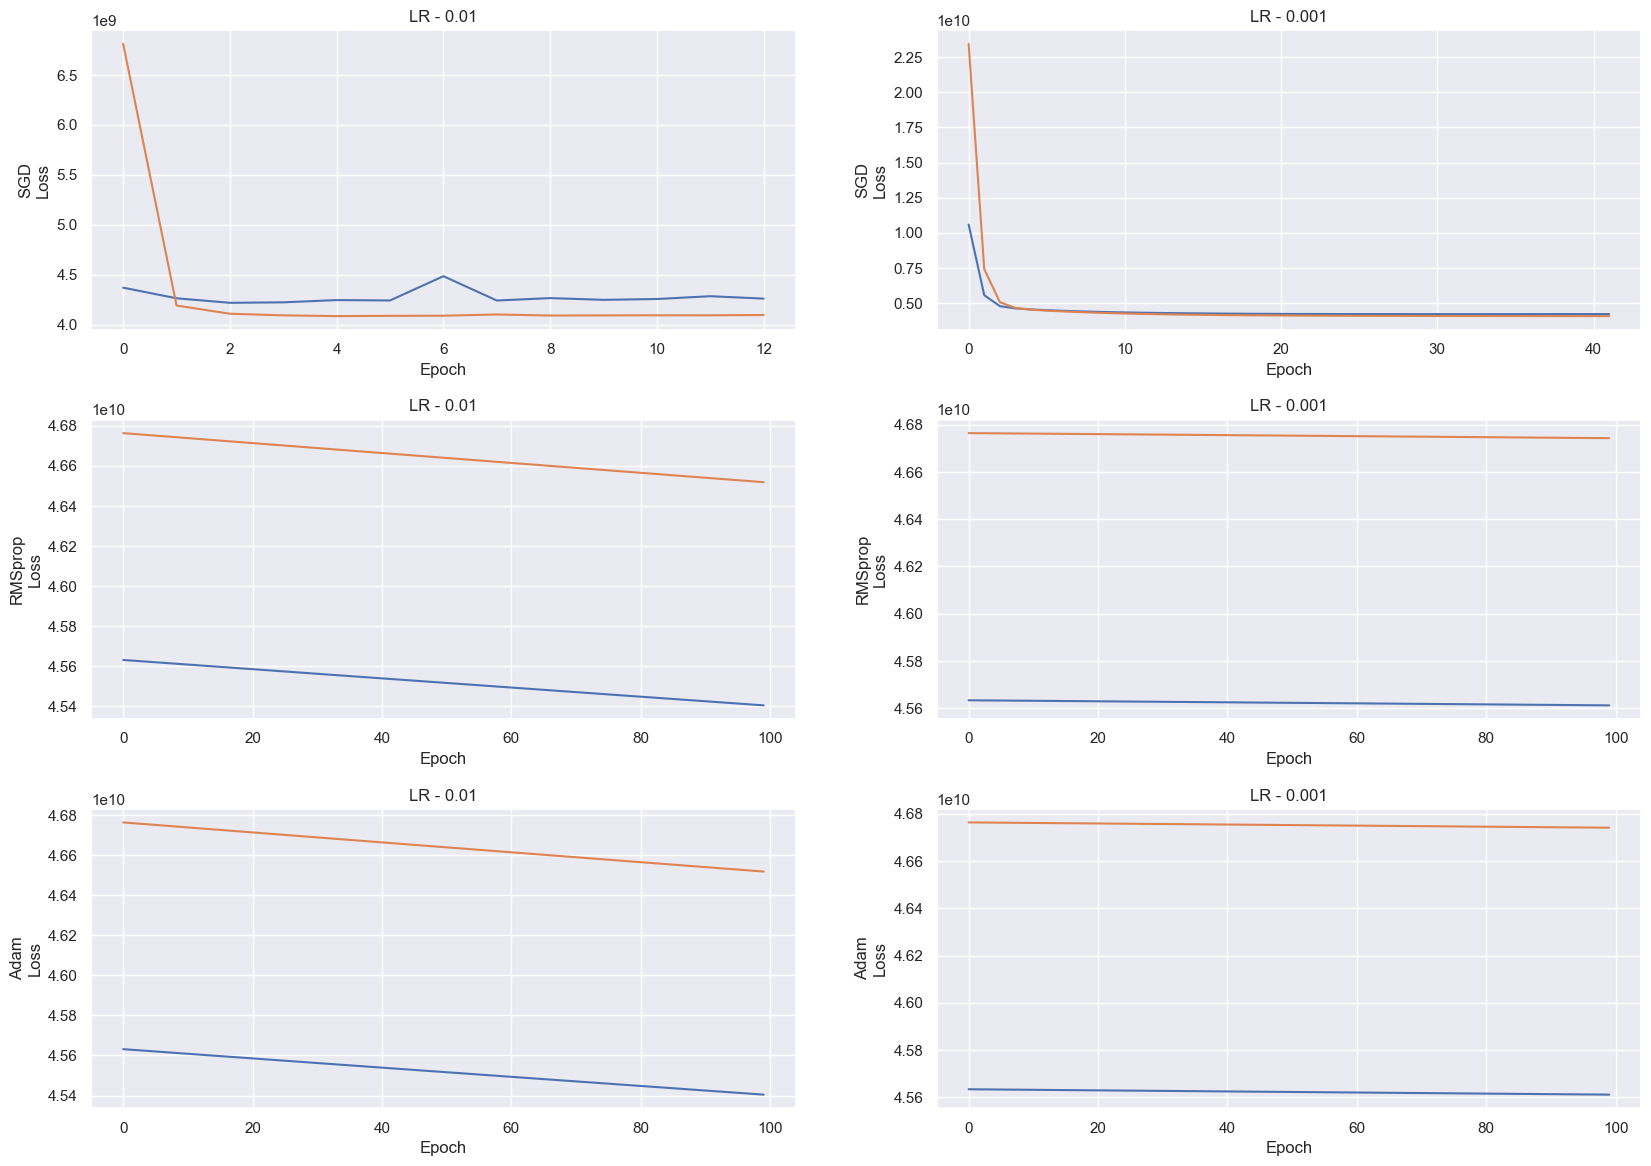

In [ ]:
print(f"Linear TF Model\n"
      "----------------\n"
      "Trainable Params - 8\n"
      "Hidden Layers - 0\n"
      "Epochs - 100\n"
      "Loss - Mean Squared Error\n"
      "Batch size - 32\n")

fig, axs = plt.subplots(3, 2, figsize=(20, 14))
plt.subplots_adjust(hspace=0.3)
i = j = 0
mae_tab_list = []
rmse_tab_list = []

for optimizer_name in optimizers:
    j=0
    mae_list = [optimizer_name]
    rmse_list = [optimizer_name]
    for learning_rate in learning_rates:
        model = tf.keras.Sequential(
          [
            layers.Input(shape=(7,)),
            layers.Dense(1, activation='relu')
          ]
        )

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=10)

        model.compile(optimizer=optimizers[optimizer_name](learning_rate),
                       loss='mean_squared_error',
                       metrics=['mean_absolute_error'])

        model_history = model.fit(X_train,
                                   y_train,
                                   epochs=100,
                                   batch_size=32,
                                   validation_data=[X_test, y_test],
                                   callbacks=[early_stopping],
                                   verbose=0)

        mae = mean_absolute_error(y_test, model.predict(X_test, verbose=0))
        rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test, verbose=0)))
        mae_list += [mae]
        rmse_list += [rmse]

        axs[i, j].plot(model_history.epoch, model_history.history['val_loss'])
        axs[i, j].plot(model_history.epoch, model_history.history['loss'])
        axs[i, j].set_title(f'LR - {learning_rate}')
        axs[i, j].set(xlabel='Epoch', ylabel=f'{optimizer_name}\nLoss')

        del model, model_history, early_stopping
        j+=1

    mae_tab_list+=[mae_list]
    rmse_tab_list+=[rmse_list]
    i+=1

mae_headers = ['MAE(Optimizer vs LR)', '0.01', '0.001']
rmse_headers = ['RMSE(Optimizer vs LR)', '0.01', '0.001']
print(tabulate(mae_tab_list, headers=mae_headers, tablefmt="simple_grid"))
print(tabulate(rmse_tab_list, headers=rmse_headers, tablefmt="simple_grid"))


Dense TF Model
----------------
Trainable Params - 221
Hidden Layers - 2
Epochs - 100
Loss - Mean Squared Error
Batch size - 32

┌────────────────────────┬──────────┬──────────┐
│ MAE(Optimizer vs LR)   │     0.01 │    0.001 │
├────────────────────────┼──────────┼──────────┤
│ SGD                    │ 190484   │ 190484   │
├────────────────────────┼──────────┼──────────┤
│ RMSprop                │  43649.9 │ 190484   │
├────────────────────────┼──────────┼──────────┤
│ Adam                   │  41433.2 │  70326.4 │
└────────────────────────┴──────────┴──────────┘
┌─────────────────────────┬──────────┬──────────┐
│ RMSE(Optimizer vs LR)   │     0.01 │    0.001 │
├─────────────────────────┼──────────┼──────────┤
│ SGD                     │ 213620   │ 213620   │
├─────────────────────────┼──────────┼──────────┤
│ RMSprop                 │  60388.8 │ 213620   │
├─────────────────────────┼──────────┼──────────┤
│ Adam                    │  58017   │  95875.3 │
└─────────────────────────┴───

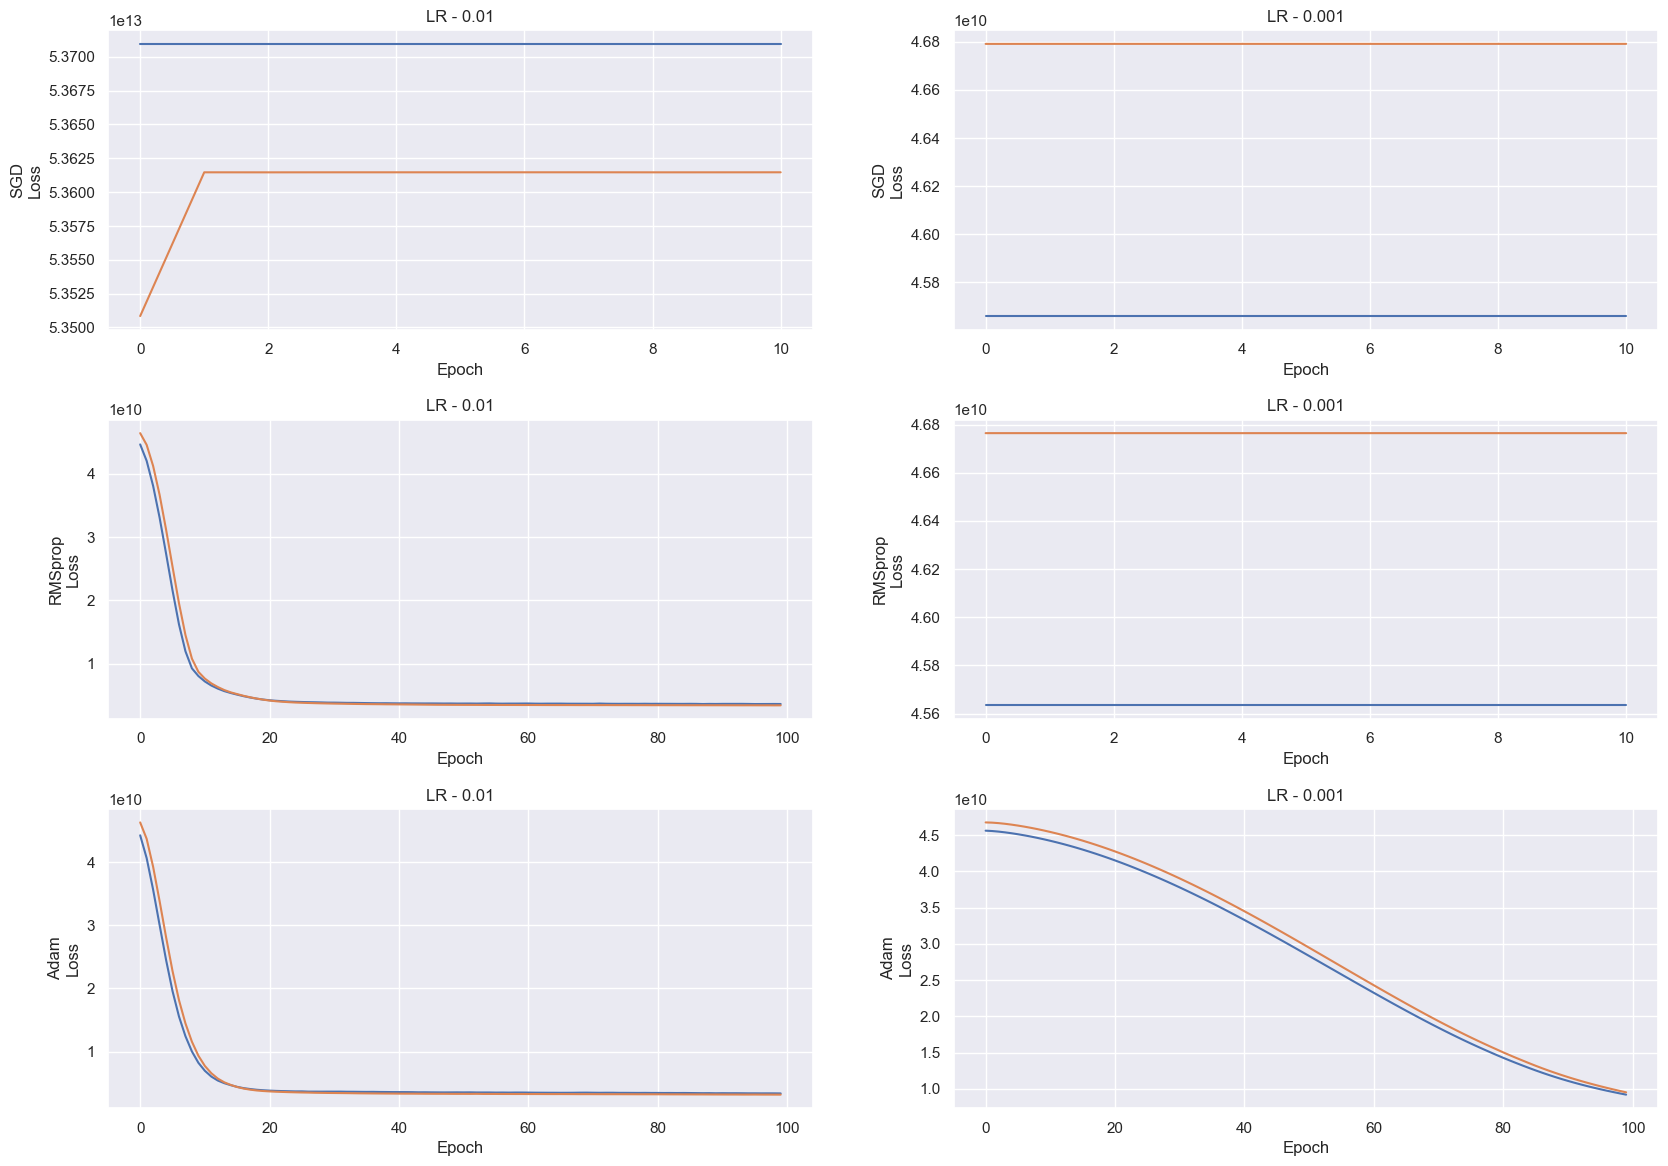

In [ ]:
print(f"Dense TF Model\n"
      "----------------\n"
      "Trainable Params - 221\n"
      "Hidden Layers - 2\n"
      "Epochs - 100\n"
      "Loss - Mean Squared Error\n"
      "Batch size - 32\n")

fig, axs = plt.subplots(3, 2, figsize=(20, 14))
plt.subplots_adjust(hspace=0.3)
i = j = 0
mae_tab_list = []
rmse_tab_list = []

for optimizer_name in optimizers:
    j=0
    mae_list = [optimizer_name]
    rmse_list = [optimizer_name]

    for learning_rate in learning_rates:
        model = tf.keras.Sequential(
                  [
                    layers.Input(shape=(7,)),
                    layers.Dense(10, activation='sigmoid'),
                    layers.Dense(10, activation='relu'),
                    layers.Dense(1, activation='relu')
                  ]
                )

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=10)

        model.compile(optimizer=optimizers[optimizer_name](learning_rate),
                       loss='mean_squared_error',
                       metrics=['mean_absolute_error'])

        model_history = model.fit(X_train,
                                  y_train,
                                  epochs=100,
                                  batch_size=32,
                                  validation_data=[X_test, y_test],
                                  callbacks=[early_stopping],
                                  verbose=0)

        mae = mean_absolute_error(y_test, model.predict(X_test, verbose=0))
        rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test, verbose=0)))

        mae_list += [mae]
        rmse_list += [rmse]

        axs[i, j].plot(model_history.epoch, model_history.history['val_loss'])
        axs[i, j].plot(model_history.epoch, model_history.history['loss'])
        axs[i, j].set_title(f'LR - {learning_rate}')
        axs[i, j].set(xlabel='Epoch', ylabel=f'{optimizer_name}\nLoss')

        del model, model_history, early_stopping
        j+=1

    mae_tab_list+=[mae_list]
    rmse_tab_list+=[rmse_list]
    i+=1

mae_headers = ['MAE(Optimizer vs LR)', '0.01', '0.001']
rmse_headers = ['RMSE(Optimizer vs LR)', '0.01', '0.001']
print(tabulate(mae_tab_list, headers=mae_headers, tablefmt="simple_grid"))
print(tabulate(rmse_tab_list, headers=rmse_headers, tablefmt="simple_grid"))

## Best Regression Deep Learning model

From the above model analysis, we can clearly see that `MLPRegressor` and `DNN with 2 hidden layers` performed very well.

Among those the best performing model was `DNN` with configuration as follows,
* Trainable Params - 221
* Hidden Layers - 2
* Loss function - Mean Squared Error
* Optimizer - Adam
* Learning Rate - 0.01
* Epoch - 100


##### Let's do a K-fold Cross-Validation for this model, and see how it performs
- K-folds = 5

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
X = pd.concat([
    pd.DataFrame(X_train),
    pd.DataFrame(X_test)
])

X.reset_index(drop='index', inplace=True)

y = pd.concat([
    pd.DataFrame(y_train),
    pd.DataFrame(y_test)
])

y.reset_index(drop='index', inplace=True)

In [ ]:
k = 5

# Initialize K-Fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics (e.g., RMSE)
rmse_scores = []
mae_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model = tf.keras.Sequential(
                  [
                    layers.Input(shape=(7,)),
                    layers.Dense(10, activation='sigmoid'),
                    layers.Dense(10, activation='relu'),
                    layers.Dense(1, activation='relu')
                  ]
                )

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=10)

    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
                   loss='mean_squared_error',
                   metrics=['mean_absolute_error'])

    model_history = model.fit(X_train,
                              y_train,
                              epochs=100,
                              batch_size=32,
                              validation_data=[X_test, y_test],
                              callbacks=[early_stopping],
                              verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test, verbose=0)

    # Calculate the MAE, RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae =  mean_absolute_error(y_test, y_pred)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Calculate the average MAE, RMSE across all folds
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)

print(f"MAE scores - {mae_scores}")
print(f"RMSE scores - {rmse_scores}")

print(f"Mean MAE - {average_mae}")
print(f"Mean RMSE - {average_rmse}")

MAE scores - [193007.65877862595, 41625.06386867844, 41035.74522105598, 41763.59586513995, 41684.34941997805]
RMSE scores - [216248.25537839314, 57772.892631448616, 56215.98557718194, 57872.25771527348, 57787.031289184946]
Mean MAE - 71823.28263069567
Mean RMSE - 89179.28451829642


In [51]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
X_test_imputed = imputer.transform(X_test[numerical_cols])

# Concatenate encoded features with imputed numerical features
X_train_processed = np.concatenate((X_train_encoded, X_train_imputed), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test_imputed), axis=1)

# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred_linear = linear_model.predict(X_test_processed)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression Model:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
# Print the predictions
print("Predictions:", y_pred_linear)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
X_test_imputed = imputer.transform(X_test[numerical_cols])

# Concatenate encoded features with imputed numerical features
X_train_processed = np.concatenate((X_train_encoded, X_train_imputed), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test_imputed), axis=1)

# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test_processed)


# Calculate Mean Squared Error (MSE)
mse_logistic = mean_squared_error(y_test, y_pred_logistic)

# Calculate Mean Absolute Error (MAE)
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)

print("Logistic Regression Model:")
print("Mean Squared Error:", mse_logistic)
print("Mean Absolute Error:", mae_logistic)
# Print the predictions
print("Predictions:", y_pred_logistic)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
X_test_imputed = imputer.transform(X_test[numerical_cols])

# Concatenate encoded features with imputed numerical features
X_train_processed = np.concatenate((X_train_encoded, X_train_imputed), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test_imputed), axis=1)

# Import Decision Tree from sklearn
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor()

# Train the model on the training data
tree_model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred_tree = tree_model.predict(X_test_processed)

# Print the predictions
print("Predictions:", y_pred_tree)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("Decision Tree Model:")
print("Mean Squared Error:", mse_tree)
print("Mean Absolute Error:", mae_tree)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
X_test_imputed = imputer.transform(X_test[numerical_cols])

# Concatenate encoded features with imputed numerical features
X_train_processed = np.concatenate((X_train_encoded, X_train_imputed), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test_imputed), axis=1)

# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
forest_model = RandomForestRegressor()

# Train the model on the training data
forest_model.fit(X_train_processed, y_train)

# Make predictions on the testing data
y_pred_forest = forest_model.predict(X_test_processed)

# Print the predictions
print("Predictions:", y_pred_forest)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)



print("Random Forest Model:")
print("Mean Squared Error:", mse_forest)
print("Mean Absolute Error:", mae_forest)



Predictions: [ 82754. 147975. 327235. ... 144553. 251047. 255471.]
Random Forest Model:
Mean Squared Error: 2034744905.3782468
Mean Absolute Error: 28952.40996383958


The Random Forest model performed the best among the models tested. Here's a summary of the evaluation metrics:

    Linear Regression Model:
        Mean Squared Error: 4,904,409,297.41
        Mean Absolute Error: 50,702.17

    Logistic Regression Model:
        Mean Squared Error: 53,903,707,216.44
        Mean Absolute Error: 179,766.97

    Decision Tree Model:
        Mean Squared Error: 4,199,755,446.19
        Mean Absolute Error: 40,089.91

    Random Forest Model:
        Mean Squared Error: 2,034,744,905.38
        Mean Absolute Error: 28,952.41

The Random Forest model has the lowest MSE and MAE values among the models, indicating that it performed the best in terms of minimizing prediction errors. Additionally, the predictions from the Random Forest model seem to be closer to the actual target values compared to the other models.

Therefore, based on the provided evaluation metrics and predictions, the Random Forest model appears to be the best choice for this particular regression task.

**Further Analysis of California Housing Dataset:**


#Feature Engineering
Explore additional features or transformations of existing features to enhance model performance and gain deeper insights into housing prices. For example:
*   Calculate population density.
*   Create categorical variables based on geographical proximity to amenities or landmarks.

#Model Tuning
Optimize hyperparameters of machine learning models to improve predictive performance. For instance:
*   Tune hyperparameters such as the maximum depth of decision trees or the number of trees in a random forest.

#Ensemble Methods
Experiment with ensemble methods to further boost model performance. Consider:

*   Trying gradient boosting or stacking techniques to combine multiple models for better predictive accuracy.

#Cross-Validation
Use cross-validation techniques to assess model generalization performance. Ensure models perform well on unseen data by:

*   Employing techniques like k-fold cross-validation.

#Feature Importance Analysis
Analyze feature importance scores from models to understand which features impact housing prices the most. Gain valuable insights for:


*   Policymakers.
*   Real estate professionals.
*   Prospective homebuyers.


#Model Interpretability
Explore techniques for interpreting and explaining model predictions. Help stakeholders understand factors driving housing prices and make informed decisions based on model insights.